### 1.Data Cleaning And Preparation

##### a.Load the dataset into a Pandas DataFrame and display the first five rows.

In [1]:
import pandas as pd

data = pd.read_csv('ecommerce_data.csv')

print(data.head())

   Order ID     Product     Category  Quantity Ordered  Price Each  \
0         1      Laptop  Electronics                 1      834.18   
1         2       Shoes      Apparel                 4      903.27   
2         3      Laptop  Electronics                 2      365.51   
3         4      Pillow   Home Goods                 5      169.17   
4         5  Smartphone  Electronics                 5      498.51   

            Order Date      City  Customer ID  
0  2024-07-28 15:26:51   Chicago         4676  
1  2024-01-26 13:10:16  New York         1891  
2  2024-12-02 20:36:02   Chicago         4254  
3  2024-04-27 02:18:27   Houston         2859  
4  2024-03-31 06:02:42   Phoenix         5713  


##### b.Check for missing or null values in the dataset. Handle these appropriately. 

In [2]:
print(data.isnull().sum())

Order ID            0
Product             0
Category            0
Quantity Ordered    0
Price Each          0
Order Date          0
City                0
Customer ID         0
dtype: int64


In [3]:
data_cleaned = data.dropna()
print(f"Number of rows after cleaning: {data_cleaned.shape[0]}")

Number of rows after cleaning: 1000


##### c.Convert columns to appropriate data types (e.g., Order Date to datetime).

In [4]:
print(data_cleaned.dtypes)

Order ID              int64
Product              object
Category             object
Quantity Ordered      int64
Price Each          float64
Order Date           object
City                 object
Customer ID           int64
dtype: object


In [5]:
data_cleaned['Order Date'] = pd.to_datetime(data_cleaned['Order Date'])

In [6]:
print(data_cleaned.dtypes)

Order ID                     int64
Product                     object
Category                    object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
City                        object
Customer ID                  int64
dtype: object


##### d.Create a new column, Total Price, which is the product of Quantity Ordered and Price Each

In [7]:
data_cleaned['Total Price'] = data_cleaned['Quantity Ordered'] * data_cleaned['Price Each']

print(data_cleaned.head())

   Order ID     Product     Category  Quantity Ordered  Price Each  \
0         1      Laptop  Electronics                 1      834.18   
1         2       Shoes      Apparel                 4      903.27   
2         3      Laptop  Electronics                 2      365.51   
3         4      Pillow   Home Goods                 5      169.17   
4         5  Smartphone  Electronics                 5      498.51   

           Order Date      City  Customer ID  Total Price  
0 2024-07-28 15:26:51   Chicago         4676       834.18  
1 2024-01-26 13:10:16  New York         1891      3613.08  
2 2024-12-02 20:36:02   Chicago         4254       731.02  
3 2024-04-27 02:18:27   Houston         2859       845.85  
4 2024-03-31 06:02:42   Phoenix         5713      2492.55  


#### 2. Sales Analysis

In [8]:
Revenue = data_cleaned['Total Price'].sum()
print(Revenue)

1578547.12


##### a.Calculate the total revenue generated by the city.

In [9]:
data_cleaned['Revenue'] = data_cleaned['Quantity Ordered'] * data_cleaned['Price Each']
Revenue = data_cleaned['Revenue']
revenue_by_city = data_cleaned.groupby('City')['Revenue'].sum().reset_index()
    
print(revenue_by_city)

          City    Revenue
0      Chicago  188616.21
1       Dallas  181207.13
2      Houston  206380.13
3  Los Angeles  214139.13
4     New York  199971.19
5      Phoenix  200823.90
6  San Antonio  183016.12
7    San Diego  204393.31


##### b.Identify the top 5 products based on total sales revenue.

In [10]:
revenue_by_products = data_cleaned.groupby('Product')['Revenue'].sum().reset_index()
top_5_products = revenue_by_products.sort_values(by='Revenue', ascending=False).head()
print(top_5_products)


       Product    Revenue
12  Smartphone  126562.51
11       Shoes  115038.76
7        Jeans  114699.49
9       Laptop  112218.17
10      Pillow  111572.81


##### c. Find the month with the highest sales and plot a graph to show monthly revenue.



In [11]:
data_cleaned['Month'] = data_cleaned['Order Date'].dt.month
print(data_cleaned['Month'])


0       7
1       1
2      12
3       4
4       3
       ..
995     6
996     7
997     6
998    11
999     4
Name: Month, Length: 1000, dtype: int64


In [12]:
revenue_by_month = data_cleaned.groupby('Month')['Revenue'].sum().reset_index()
top_month = revenue_by_month.sort_values(by='Revenue', ascending=False).head(1)
print(top_month)

   Month   Revenue
6      7  174472.2


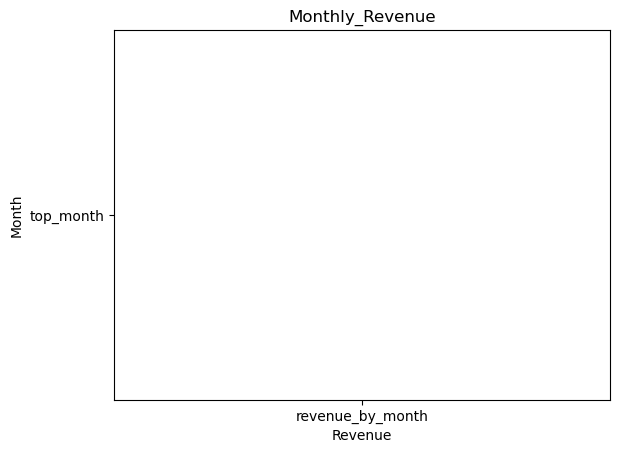

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Month = ['top_month']
Revenue = ('revenue_by_month')
plt.bar(Revenue, Month)
plt.xlabel('Revenue')
plt.ylabel('Month')
plt.title('Monthly_Revenue')
plt.show()
